<a href="https://colab.research.google.com/github/Reza-aghajari/ML2023/blob/main/P1Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1ze2KX99xKI8BheBenqK6bNRV1DUScesr

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
Downloading...
From: https://drive.google.com/uc?id=1ze2KX99xKI8BheBenqK6bNRV1DUScesr
To: /content/heart_disease_health_indicators.csv
100% 11.8M/11.8M [00:00<00:00, 74.4MB/s]


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('heart_disease_health_indicators.csv')
df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253656,0,0,0,1,25,0,0,0,1,1,...,1,0,1,0,0,0,0,4,6,8
253657,0,0,1,1,24,0,0,0,0,0,...,1,0,3,0,0,0,0,7,5,3
253658,0,0,0,0,27,0,0,0,1,0,...,1,1,2,0,0,0,0,3,6,5
253659,0,0,1,1,37,0,0,2,0,0,...,1,0,4,0,0,0,0,6,4,1


In [4]:
df = pd.DataFrame(df)
firstcolumn = df.pop('HeartDiseaseorAttack')
df.insert(len(df.columns), 'HeartDiseaseorAttack', firstcolumn)
df_out1 = df[df['HeartDiseaseorAttack'] == 1].head(100)
df_out0 = df[df['HeartDiseaseorAttack'] == 0].head(100)
combined_df = df_out1.append(df_out0)
combined_df

<ipython-input-4-18a3c56cfece>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = df_out1.append(df_out0)


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,HeartDiseaseorAttack
8,1,1,1,30,1,0,2,0,1,1,...,0,5,30,30,1,0,9,5,1,1
20,1,1,1,22,0,1,0,0,1,0,...,0,3,30,0,1,0,12,4,4,1
26,1,1,1,37,1,1,2,0,0,1,...,0,5,0,0,1,1,10,6,5,1
27,1,1,1,28,1,0,2,0,0,1,...,0,4,0,0,0,1,12,2,4,1
47,1,1,1,25,1,0,0,0,1,1,...,0,2,1,0,0,1,10,4,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,1,1,1,26,0,0,0,0,1,1,...,0,5,0,20,1,0,13,6,4,0
112,0,0,1,30,1,0,0,0,0,1,...,0,3,0,0,0,1,9,4,6,0
113,1,0,1,27,0,0,0,1,1,1,...,0,3,0,0,0,1,8,6,8,0
114,0,1,1,26,0,0,0,1,1,0,...,0,2,1,0,0,0,8,6,6,0


In [5]:
X = combined_df.iloc[:,0:-1]
y = combined_df.iloc[:,-1]

x_train,x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=83)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((160, 21), (160,), (40, 21), (40,))

In [6]:
from sklearn.linear_model import LogisticRegression, SGDClassifier

model = LogisticRegression(solver='sag', max_iter=1000, random_state=83)
model.fit(x_train, y_train)
model.predict(x_test), y_test

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


(array([1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
        1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1]),
 324    1
 221    1
 70     0
 509    1
 14     0
 66     0
 10     0
 255    1
 92     0
 29     0
 662    1
 57     0
 537    1
 53     0
 102    0
 348    1
 413    1
 414    1
 51     0
 42     0
 108    0
 7      0
 393    1
 62     0
 13     0
 113    0
 33     0
 122    1
 63     0
 55     0
 21     0
 96     0
 363    1
 807    1
 72     0
 508    1
 89     1
 3      0
 445    1
 67     0
 Name: HeartDiseaseorAttack, dtype: int64)

In [7]:
print(model.score(x_train, y_train))

0.7375


In [8]:
print(model.score(x_test, y_test))

0.575


In [9]:
model1 = SGDClassifier(loss= 'log_loss', random_state=83)
model1.fit(x_train, y_train)

SGDClassifier(loss='log_loss', random_state=83)

In [10]:
print(model1.score(x_train, y_train))

0.69375


In [11]:
print(model1.score(x_test, y_test))

0.575


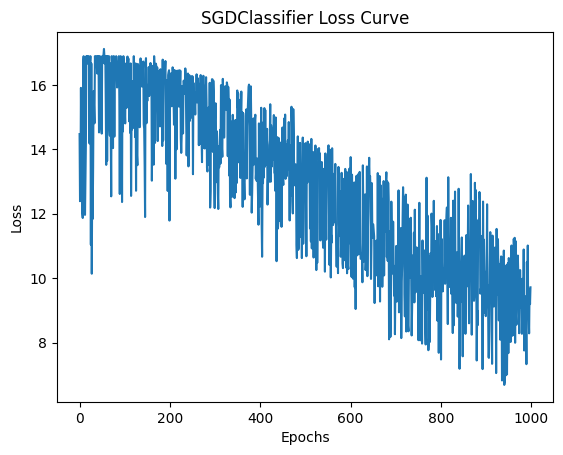

In [12]:
from sklearn.metrics import log_loss
model1 = SGDClassifier(loss='log_loss', random_state=83)
model1.fit(x_train, y_train)

model1_proba = model1.predict_proba(x_train)

losses = []
for epoch in range(1, 1000):
    model1.partial_fit(x_train, y_train, classes=np.unique(y_train))
    epoch_loss = log_loss(y_train, model1.predict_proba(x_train))
    losses.append(epoch_loss)

plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('SGDClassifier Loss Curve')
plt.show()

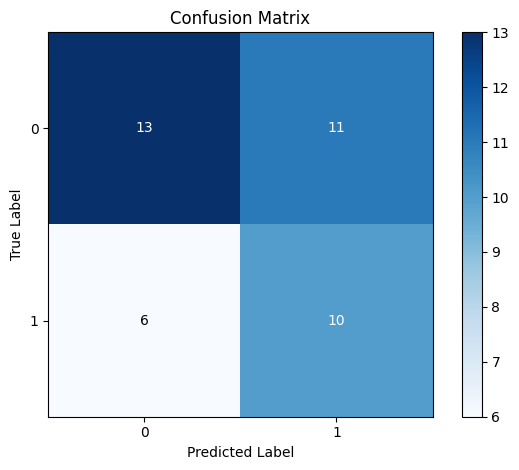

In [13]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
confusion_matrix = confusion_matrix(y_test, y_pred)

plt.imshow(confusion_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()

classes = [0, 1]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = confusion_matrix.max() / 2.
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        plt.text(j, i, format(confusion_matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if confusion_matrix[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()